Step 3 - Climate Analysis and Exploration

You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.


Create a Jupyter Notebook file called climate_analysis.ipynb and use it to complete your climate analysis and data exporation.
Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.
Use SQLAlchemy create_engine to connect to your sqlite database.
Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

In [1]:
#imports dependencies
import pandas as pd
import seaborn
seaborn.set()
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base


In [2]:
#Connect to the database
engine=create_engine("sqlite:///hawaii.sqlite")

In [3]:
#Reading the tables from the database
Base=automap_base()
Base.prepare(engine, reflect=True)

In [4]:
#creating a session
from sqlalchemy.orm import sessionmaker
Session=sessionmaker(bind=engine)
session=Session()

In [5]:
#Reading the tables
Station=Base.classes.station
Measurement=Base.classes.measurement

Precipitation Analysis


Design a query to retrieve the last 12 months of precipitation data.
Select only the date and prcp values.
Load the query results into a Pandas DataFrame and set the index to the date column.
Plot the results using the DataFrame plot method.




In [6]:
#Query the database
results=engine.execute('SELECT date,prcp FROM measurement').fetchall()
results

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-20', 0.03),
 ('2010-02-21', 0.0),
 ('2010-02-22', 0.0),
 ('2010-02-23', 0.0),
 ('2010-02-24', 0.0)

In [7]:
prcp_results=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > '2017-05-03').\
    order_by(Measurement.date).all()

In [8]:
prcp_df=pd.DataFrame(prcp_results)
prcp_df.head()

,date,prcp
0,2017-05-04,0.00
1,2017-05-04,0.00
2,2017-05-04,0.08
3,2017-05-04,0.00
4,2017-05-04,0.00


In [9]:
new_prcp_df=prcp_df.set_index("date")
new_prcp_df.head()

,prcp
date,
2017-05-04,0.00
2017-05-04,0.00
2017-05-04,0.08
2017-05-04,0.00
2017-05-04,0.00


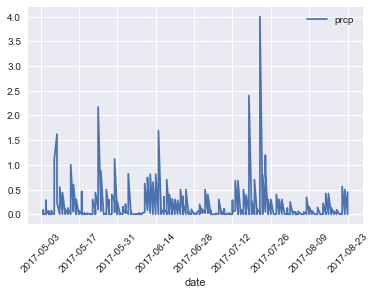

In [10]:
new_prcp_df.plot()
plt.xticks(rotation=45)
plt.xlabel("date")
plt.legend()
plt.show()

In [11]:
#Summary Statistics of percipation
new_prcp_df.describe()

,prcp
count,578.000000
mean,0.127682
std,0.300660
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.000000


Station Analysis


Design a query to calculate the total number of stations.

Design a query to find the most active stations.


List the stations and observation counts in descending order
Which station has the highest number of observations?



Design a query to retrieve the last 12 months of temperature observation data (tobs).


Filter by the station with the highest number of observations.
Plot the results as a histogram with bins=12.

In [12]:
from sqlalchemy import func
session.query(func.count(Station.station_id)).all()

[(9)]

In [13]:
#The most active stations
station_data=engine.execute("""select station,count(measurement_id ) as 'measurement'
from measurement
group by station
order by measurement desc""").fetchall()
station_data

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [14]:
best_station=station_data[0][0]

In [15]:
#temperature data for one year for the best station
tobs=session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.date > '2017-05-03').\
    filter(Measurement.station==best_station).\
    order_by(Measurement.date).all()
#To show only the first 10 dates
tobs[:10]

[(datetime.date(2017, 5, 4), 75),
 (datetime.date(2017, 5, 5), 70),
 (datetime.date(2017, 5, 6), 79),
 (datetime.date(2017, 5, 7), 75),
 (datetime.date(2017, 5, 8), 70),
 (datetime.date(2017, 5, 9), 67),
 (datetime.date(2017, 5, 10), 74),
 (datetime.date(2017, 5, 11), 70),
 (datetime.date(2017, 5, 12), 75),
 (datetime.date(2017, 5, 13), 76)]

In [16]:
tobs_df=pd.DataFrame(tobs)
tobs_df.head()

,date,tobs
0,2017-05-04,75
1,2017-05-05,70
2,2017-05-06,79
3,2017-05-07,75
4,2017-05-08,70


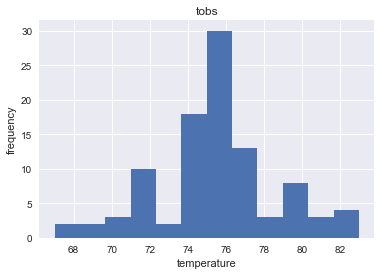

In [17]:
#plot the histogram
tobs_df.hist("tobs", bins=12)
plt.xlabel("temperature")
plt.ylabel("frequency")
plt.show()

Temperature Analysis


Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

Plot the min, avg, and max temperature from your previous query as a bar chart.


Use the average temperature as the bar height.
Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [18]:
def calc_temps(start, end):
    temp=session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.date >= start).\
    filter(Measurement.date<=end).\
    all()
    temp_df=pd.DataFrame(temp)
    return temp_df.tobs.min(),temp_df.tobs.mean(),temp_df.tobs.max()

     
low, mid, hi=calc_temps("2017-05-03", "2017-05-10")
    

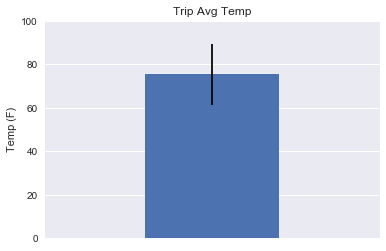

In [19]:
plt.bar(0,mid,yerr=hi-low)
plt.axis([-1,1,0,100])
plt.xticks([])
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp")
plt.show()